In [164]:
import numpy as np
import matplotlib.pyplot as plt
import utils_fig as uf

from importlib import reload

import sys
sys.path.append("../include")
import hhtools
import hhsignal

uf.set_plt()

# Sample activities (raster, MUA, LFP)
Show sample trajectories of Slow and Fast populations

In [45]:
data = uf.load_pickle("../two_pop_mpi/postdata/activity_sample.pkl")
print(data['attrs'])

craster = ("#d70606", "#003f5c")
details = data["details"]
figwidth = 14 * uf.cm
figheight = 2.5 * uf.cm

{'types': ('F', 'S'), 'nids': ([24, 22, 0], [20, 14, 0]), 'fdirs': ('./data/pe_nu_fast/', './data/pe_nu_slow/')}


## Raster plot

In [46]:
def compute_mua(detail, st=0.001, srate=1000, dt=0.01):
    from scipy.ndimage import gaussian_filter1d
    
    t0, t1 = detail['ts'][0], detail['ts'][-1]
    t = np.arange(t0, t1+1/2/srate, 1/srate)
    mua = np.zeros_like(t)
    for step_spk in detail['step_spk']:
        for n in step_spk:
            nt = int((n*dt*1e-3-t0) * srate)
            mua[nt] += 1
            
    s = st * srate
    mua = gaussian_filter1d(mua, s)
    return mua, t


def _remove_axis():
    plt.xticks([])
    plt.yticks([])
    uf.show_spline(plt.gca())

Saved figure to fig1_fast


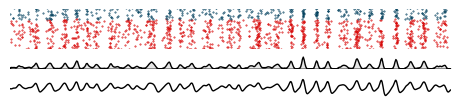

In [50]:
xl = (1500, 2000)

fig = plt.figure(figsize=(figwidth, figheight))

# Raster
plt.axes(position=(0.1, 0.55, 0.8, 0.4))
hhtools.draw_spk(details[0]["step_spk"], xl=xl, colors=craster, color_ranges=(800, 1000), ms=0.8)
plt.ylim([500, 900])
_remove_axis()

# MUA
plt.axes(position=(0.1, 0.35, 0.8, 0.2))
mua, t = compute_mua(details[0], st=0.001, srate=1000)
t *= 1e3

idt = (t >= xl[0]) & (t < xl[1])
plt.fill_between(t[idt], np.zeros_like(mua[idt])-1, mua[idt], color=(0.9,0.9,0.9), edgecolor='k', linewidth=1)
plt.xlim(xl)
plt.ylim([0, 60])
_remove_axis()

plt.axes(position=(0.1, 0.05, 0.8, 0.22))
t = details[0]["ts"]*1e3
idt = (t >= xl[0]) & (t < xl[1])
plt.plot(t[idt], details[0]["vlfp"][idt], c='k', lw=1)
plt.xlim(xl)
plt.ylim([-8, 8])
_remove_axis()

uf.save_fig("fig1_fast")

plt.show()

**Slow population**

Saved figure to fig1_slow


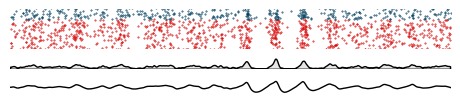

In [51]:
xl = (1800, 2300)

fig = plt.figure(figsize=(figwidth, figheight))

# Raster
plt.axes(position=(0.1, 0.55, 0.8, 0.4))
hhtools.draw_spk(details[1]["step_spk"], xl=xl, colors=craster, color_ranges=(800, 1000), ms=0.8)
plt.ylim([500, 900])
_remove_axis()

# MUA
plt.axes(position=(0.1, 0.35, 0.8, 0.2))
mua, t = compute_mua(details[1], st=0.001, srate=1000)
t *= 1e3

idt = (t >= xl[0]) & (t < xl[1])
plt.fill_between(t[idt], np.zeros_like(mua[idt])-1, mua[idt], color=(0.9,0.9,0.9), edgecolor='k', linewidth=1)
plt.xlim(xl)
plt.ylim([0, 60])
_remove_axis()

plt.axes(position=(0.1, 0.05, 0.8, 0.22))
t = details[0]["ts"]*1e3
idt = (t >= xl[0]) & (t < xl[1])
plt.plot(t[idt], details[1]["vlfp"][idt], c='k', lw=1.)
plt.xlim(xl)
plt.ylim([-8, 8])
_remove_axis()

uf.save_fig("fig1_slow")

plt.show()

**Scale bars**

Saved figure to fig1_scalebar_h


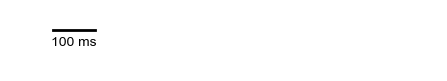

In [52]:
fig = plt.figure(figsize=(figwidth, .8))
uf.show_scalebar(plt.gca(), size=100, label="100 ms",
                 anchor_pos=(1100, 400), color='k', lw=2, pad=3,
                fontsize=10)
plt.xlim((1000, 2000))
plt.ylim([380, 410])
plt.axis("off")
uf.save_fig("fig1_scalebar_h")
plt.show()

Saved figure to fig1_scalebar_v


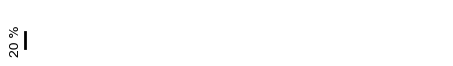

In [53]:
fig = plt.figure(figsize=(figwidth, 0.6))
uf.show_scalebar(plt.gca(), size=20, label="20 %",
                 anchor_pos=(10, 10), color='k', lw=2, pad=3,
                 vh="vertical", fontsize=10)
plt.xlim([0, 500])
plt.ylim([0, 60])

# plt.xlim(xl)
# plt.ylim([380, 410])
plt.axis("off")
uf.save_fig("fig1_scalebar_v")
plt.show()

Saved figure to fig1_scalebar_v_lfp


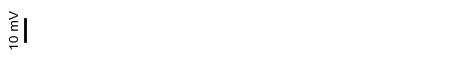

In [54]:
fig = plt.figure(figsize=(figwidth, 0.4))
uf.show_scalebar(plt.gca(), size=10, label="10 mV",
                 anchor_pos=(10, -5), color='k', lw=2, pad=3,
                 vh="vertical", fontsize=10)
plt.xlim([0, 500])
plt.ylim([-7, 7])

plt.axis("off")
uf.save_fig("fig1_scalebar_v_lfp")
plt.show()

# Parameter space

In [176]:
from scipy.ndimage import gaussian_filter

da_fast = uf.load_dataarray("../two_pop_mpi/postdata/pe_nu_fast.nc")
da_slow = uf.load_dataarray("../two_pop_mpi/postdata/pe_nu_slow.nc")

    
def show_contourf(im_array, vmin=0, vmax=1, num=21, cmap="turbo", dc=0.1):
    x = im_array.nu
    y = im_array.pe
    im = gaussian_filter(im_array.data, 1)
    
    plt.contourf(x, y, im,
                 np.concatenate((np.linspace(vmin, vmax, num), [200])),
                 cmap=cmap, vmin=vmin, vmax=vmax)
    # plt.colorbar(ticks=np.arange(vmin, vmax))
    cbar = plt.colorbar(ticks=np.arange(vmin, vmax+dc/2, dc))
    cbar.ax.set_ylim([vmin, vmax])
    cbar.ax.tick_params(length=3)
    
    
def draw_perpendicular(x, y, xq, l=1, **kwargs):
    from scipy.interpolate import interp1d
    
    dxdt = np.gradient(x, x)
    dydt = np.gradient(y, x)
    dxdt_q = interp1d(x, dxdt)(xq)
    dydt_q = interp1d(x, dydt)(xq)
    yq = interp1d(x, y)(xq)
    
    xs, ys = [], []
    for n in range(len(dxdt_q)):
        dx = dxdt_q[n]
        dy = dydt_q[n]
        nx = -dy
        ny = dx
        norm = np.hypot(nx, ny)
        nx /= norm
        ny /= norm
        
        x0, y0 = xq[n], yq[n]
        x1 = x0 - nx * l / 2
        y1 = y0 - ny * l / 2
        x2 = x0 + nx * l / 2
        y2 = y0 + ny * l / 2
        xs.extend([x1, x2, np.nan])
        ys.extend([y1, y2, np.nan])

    plt.plot(xs, ys, **kwargs)

**Parameter space in Fast population**

Saved figure to fig1_param_space_Fast


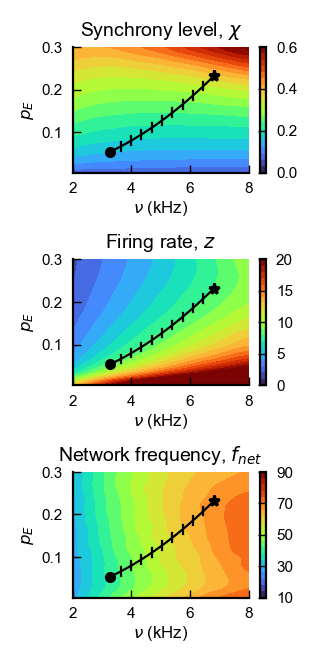

In [177]:
def _set_label():
    plt.xlabel(r"$\nu$ (kHz)", labelpad=1)
    plt.ylabel(r"$p_E$", labelpad=2)
    xt = np.arange(2000, 8001, 2000)
    plt.xticks(xt, labels=["%d"%(x//1000) for x in xt])
    plt.xlim([2000, 8000])
    plt.yticks([0.1, 0.2, 0.3])
    
def draw_echelon():
    from scipy.interpolate import interp1d
    
    ysub = y[(y>=pl[0]) & (y<=pl[1])]
    xsub = d*np.sqrt(ysub)
    plt.plot(xsub, ysub, "k-", lw=0.8)
    plt.plot(xsub[0], ysub[0], "ko", markersize=3)
    plt.plot(xsub[-1], ysub[-1], "k*", markersize=4)
    
    xq = np.linspace(xsub[0], xsub[-1], 11)
    draw_perpendicular(xsub, ysub, xq[1:-1], l=0.02, color='k', lw=0.8)


da = da_fast
d = 14142.14
pl = [0.051, 0.234]

x = da.nu
y = da.pe

plt.figure(figsize=(3.5*uf.cm, 9.2*uf.cm), dpi=200)
pos = uf.get_subax_pos(3, 1, space_row=0.12, space_col=0.1)

# Synchrony level
plt.axes(pos[-1][0])
im_array = da.sel(dict(vars="chi"))
show_contourf(im_array, vmin=0, vmax=0.6, dc=0.2)
plt.title(r"Synchrony level, $\chi$", pad=4)
draw_echelon()
_set_label()

# Firing rate
plt.axes(pos[-2][0])
im_array = da.sel(dict(vars="fr"))
show_contourf(im_array, vmin=0, vmax=20, dc=5)
plt.title(r"Firing rate, $z$", pad=4)
draw_echelon()
_set_label()

# Network frequency
plt.axes(pos[-3][0])
im_array = da.sel(dict(vars="fnet"))
show_contourf(im_array, vmin=10, vmax=90, dc=20)
plt.title(r"Network frequency, $f_{net}$", pad=4)
draw_echelon()
_set_label()

uf.save_fig("fig1_param_space_Fast")
plt.show()

**Parameter space in Slow population**

Saved figure to fig1_param_space_Slow


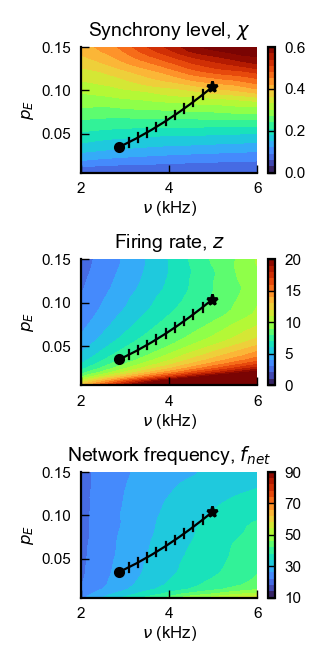

In [187]:
def _set_label():
    plt.xlabel(r"$\nu$ (kHz)", labelpad=1)
    plt.ylabel(r"$p_E$", labelpad=2)
    xt = np.arange(2000, 6001, 2000)
    plt.xticks(xt, labels=("%d"%(x//1000) for x in xt))
    plt.xlim([2000, 6000])
    plt.yticks([0.05, 0.1, 0.15])

def draw_echelon():
    ysub = y[(y>=pl[0]) & (y<=pl[1])]
    xsub = d*np.sqrt(ysub)
    plt.plot(xsub, ysub, "k", lw=0.8)
    plt.plot(xsub[0], ysub[0], "ko", markersize=3)
    plt.plot(xsub[-1], ysub[-1], "k*", markersize=4)
    # print(xsub[-1].data, ysub[-1].data)
    
    xq = np.linspace(xsub[0], xsub[-1], 11)
    draw_perpendicular(xsub, ysub, xq[1:-1], l=0.01, color='k', lw=0.8)

da = da_slow
d = 15450.58
pl = (0.028, 0.105)

plt.figure(figsize=(3.5*uf.cm, 9.2*uf.cm), dpi=200)
pos = uf.get_subax_pos(3, 1, space_row=0.12, space_col=0.1)

# Synchrony level
plt.axes(pos[-1][0])
im_array = da.sel(dict(vars="chi"))
show_contourf(im_array, vmin=0, vmax=0.6, dc=0.2)
plt.title(r"Synchrony level, $\chi$", pad=4)
draw_echelon()
_set_label()

# Firing rate
plt.axes(pos[-2][0])
im_array = da.sel(dict(vars="fr"))
show_contourf(im_array, vmin=0, vmax=20, dc=5)
plt.title(r"Firing rate, $z$", pad=4)
draw_echelon()
_set_label()

# Network frequency
plt.axes(pos[-3][0])
im_array = da.sel(dict(vars="fnet"))
show_contourf(im_array, vmin=10, vmax=90, dc=20)
plt.title(r"Network frequency, $f_{net}$", pad=4)
draw_echelon()
_set_label()

uf.save_fig("fig1_param_space_Slow")
plt.show()

# Sample spectrogram and burst
For the burst dataset, run [extracting code](../three_pop_mpi/extract_burstprobs_discon.py) first

In [71]:
# import pickle as pkl
from numba import njit
from scipy.ndimage import gaussian_filter


def hist2d(y, x, yedges, xedges):
    idx = np.digitize(x, xedges, right=False)
    idy = np.digitize(y, yedges, right=False)
    
    id_nan = (idx==0) | (idx==len(xedges))
    id_nan = id_nan | (idy==0)
    id_nan = id_nan | (idy==len(yedges))

    idx = idx[~id_nan]-1
    idy = idy[~id_nan]-1
    
    matsize = (len(yedges)-1, len(xedges)-1)
    num_hist = _count(matsize, idx, idy)
    return num_hist
    
    
# @njit
def _count(matsize, idx, idy):
    num = np.zeros(matsize)
    for n in range(len(idx)):
        num[idy[n], idx[n]] += 1
    return num


def get_mid_pts(edges):
    return (edges[1:] + edges[:-1])/2

In [72]:
# Load dataset
## spectrogram
sdata = uf.load_pickle("../three_pop_mpi/simulation_data/sample_detail.pkl")
detail = sdata["detail"]

psd_f, fpsd, tpsd = hhsignal.get_stfft(detail["vlfp"][1], detail["ts"], 2000, frange=(10, 90))
psd_s, fpsd, tpsd = hhsignal.get_stfft(detail["vlfp"][2], detail["ts"], 2000, frange=(10, 90))

## bdata
bdata = uf.load_pickle("../three_pop_mpi/simulation_data/burst_prop2.pkl")
mbin_t = bdata["attrs"]["mbin_t"]

## Data from fast population

### View for frequency-power

Saved figure to fig1_spec_burst_fast


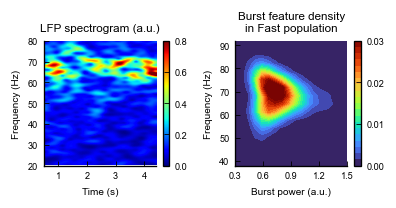

In [173]:
## Selection
nid = 0

bf = np.array(bdata['burst_props'][nid]['burst_f'])
bl = np.array(bdata['burst_props'][nid]['burst_len'])
ba = np.array(bdata['burst_props'][nid]['burst_amp'])

idx = bl*mbin_t >= 3/bf
bf = bf[idx]
ba = ba[idx]

xedges = np.linspace(0.2, 1.6, 21)
yedges = np.linspace(35, 105, 21)

im = hist2d(bf, ba, yedges, xedges)
im = gaussian_filter(im, 0.8)
x = get_mid_pts(xedges)
y = get_mid_pts(yedges)

## Draw
plt.figure(figsize=(7.8*uf.cm, 3.3*uf.cm), dpi=120)

plt.axes(position=(0.05, 0.1, 0.38, 0.8))
plt.imshow(psd_f, aspect="auto", cmap="jet", origin="lower",
           vmin=0, vmax=0.8,
           extent=(tpsd[0], tpsd[-1], fpsd[0], fpsd[-1]),
          interpolation="bicubic")

plt.xticks(np.arange(1, 5))
plt.yticks(np.arange(10, 91, 10))
plt.colorbar()
plt.ylim([20, 80])

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("LFP spectrogram (a.u.)")

# plt.subplot(122)
plt.axes(position=(0.57, 0.1, 0.38, 0.8))
plt.contourf(x, y, im/im.sum(), 
             np.concatenate((np.linspace(0,0.03,21),[1])),
             cmap="turbo", 
             vmax=0.03, vmin=0)
cbar = plt.colorbar(ticks=[0,0.01,0.02,0.03])
cbar.ax.set_ylim([0, 0.03])

plt.xticks(np.arange(0.3, 1.51, 0.3))
plt.yticks(np.arange(40, 101, 10))
plt.xlim([0.3, 1.5])
plt.ylim([38, 92])

plt.xlabel("Burst power (a.u.)")
plt.ylabel("Frequency (Hz)")
plt.title("Burst feature density\nin Fast population") # chi=0.4

uf.save_fig("fig1_spec_burst_fast")
plt.show()

### View for frequency-length

Saved figure to fig1_spec_burst_fast_freq-len


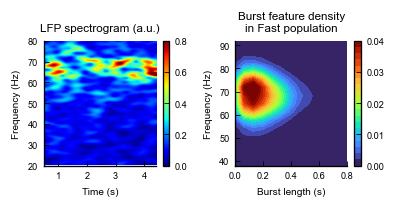

In [174]:
## Selection
nid = 0

bf = np.array(bdata['burst_props'][nid]['burst_f'])
bl = np.array(bdata['burst_props'][nid]['burst_len'])
ba = np.array(bdata['burst_props'][nid]['burst_amp'])

idx = bl*mbin_t >= 3/bf
bf = bf[idx]
ba = ba[idx]
bl = bl[idx]*mbin_t

xedges = np.linspace(-10, 120, 21)*mbin_t # -> length
yedges = np.linspace(35, 105, 21)

im = hist2d(bf, bl, yedges, xedges)
im = gaussian_filter(im, 0.8)
x = get_mid_pts(xedges)
y = get_mid_pts(yedges)

## Draw
plt.figure(figsize=(7.8*uf.cm, 3.3*uf.cm), dpi=120)

plt.axes(position=(0.05, 0.1, 0.38, 0.8))
plt.imshow(psd_f, aspect="auto", cmap="jet", origin="lower",
           vmin=0, vmax=0.8,
           extent=(tpsd[0], tpsd[-1], fpsd[0], fpsd[-1]),
          interpolation="bicubic")

plt.xticks(np.arange(1, 5))
plt.yticks(np.arange(10, 91, 10))
plt.colorbar()
plt.ylim([20, 80])

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("LFP spectrogram (a.u.)")

# plt.subplot(122)
plt.axes(position=(0.57, 0.1, 0.38, 0.8))
plt.contourf(x, y, im/im.sum(), 
             np.concatenate((np.linspace(0,0.04,21),[1])),
             cmap="turbo", 
             vmax=0.04, vmin=0)
cbar = plt.colorbar(ticks=[0,0.01,0.02,0.03,0.04])
cbar.ax.set_ylim([0, 0.04])

plt.xticks(np.arange(0, 1, 0.2))
plt.yticks(np.arange(40, 101, 10))
# plt.xlim([0.3, 1.5])
plt.xlim([0, 0.8])
plt.ylim([38, 92])

plt.xlabel("Burst length (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Burst feature density\nin Fast population") # chi=0.4

uf.save_fig("fig1_spec_burst_fast_freq-len")
plt.show()

## Data from slow population

### View for frequency-power

Saved figure to fig1_spec_burst_slow


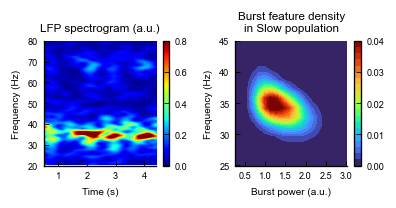

In [170]:
nid = 1

xedges = np.linspace(0.2, 3.1, 21) # -> power
yedges = np.linspace(20, 50, 21)

bf = np.array(bdata['burst_props'][nid]['burst_f'])
bl = np.array(bdata['burst_props'][nid]['burst_len'])
ba = np.array(bdata['burst_props'][nid]['burst_amp'])

idx = bl*mbin_t >= 3/bf
bf = bf[idx]
ba = ba[idx]
bl = bl[idx]*mbin_t

im = hist2d(bf, ba, yedges, xedges)
im = gaussian_filter(im, 1)
x = get_mid_pts(xedges)
y = get_mid_pts(yedges)

## Draw
plt.figure(figsize=(7.8*uf.cm, 3.3*uf.cm), dpi=120)

plt.axes(position=(0.05, 0.1, 0.38, 0.8))
plt.imshow(psd_s, aspect="auto", cmap="jet", origin="lower",
           vmin=0, vmax=0.8,
           extent=(tpsd[0], tpsd[-1], fpsd[0], fpsd[-1]),
          interpolation="bicubic")
plt.xticks(np.arange(1, 5))
plt.yticks(np.arange(10, 91, 10))
plt.colorbar()
plt.ylim([20, 80])

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("LFP spectrogram (a.u.)")

plt.axes(position=(0.57, 0.1, 0.38, 0.8))
plt.contourf(x, y, im/im.sum(),
             np.concatenate((np.linspace(0,0.04,21),[1])),
             cmap="turbo",
             vmax=0.04, vmin=0)
cbar = plt.colorbar(ticks=[0,0.01,0.02,0.03,0.04])
cbar.ax.set_ylim([0, 0.04])

plt.xticks(np.arange(0.5, 3.1, 0.5))
plt.yticks(np.arange(20, 51, 5))
plt.ylim([25, 45])

plt.xlabel("Burst power (a.u.)")
plt.ylabel("Frequency (Hz)")
plt.title("Burst feature density\nin Slow population") # chi=0.4

uf.save_fig("fig1_spec_burst_slow")
plt.show()

### View for frequency-length

Saved figure to fig1_spec_burst_slow_freq-len


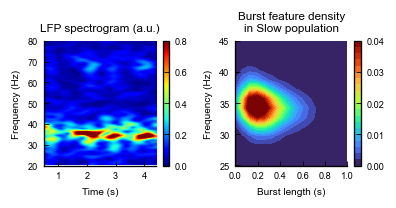

In [161]:
nid = 1

xedges = np.linspace(-10, 120, 21)*mbin_t # -> length
yedges = np.linspace(20, 50, 21)

bf = np.array(bdata['burst_props'][nid]['burst_f'])
bl = np.array(bdata['burst_props'][nid]['burst_len'])
ba = np.array(bdata['burst_props'][nid]['burst_amp'])

idx = bl*mbin_t >= 3/bf
bf = bf[idx]
ba = ba[idx]
bl = bl[idx]*mbin_t

im = hist2d(bf, bl, yedges, xedges)
im = gaussian_filter(im, 1)
x = get_mid_pts(xedges)
y = get_mid_pts(yedges)

plt.figure(figsize=(7.8*uf.cm, 3.3*uf.cm), dpi=120)

plt.axes(position=(0.05, 0.1, 0.38, 0.8))
plt.imshow(psd_s, aspect="auto", cmap="jet", origin="lower",
           vmin=0, vmax=0.8,
           extent=(tpsd[0], tpsd[-1], fpsd[0], fpsd[-1]),
          interpolation="bicubic")
plt.xticks(np.arange(1, 5))
plt.yticks(np.arange(10, 91, 10))
plt.colorbar()
plt.ylim([20, 80])

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("LFP spectrogram (a.u.)")

plt.axes(position=(0.57, 0.1, 0.38, 0.8))
plt.contourf(x, y, im/im.sum(),
             np.concatenate((np.linspace(0,0.04,21),[1])),
             cmap="turbo",
             vmax=0.04, vmin=0)
cbar = plt.colorbar(ticks=[0,0.01,0.02,0.03,0.04])
cbar.ax.set_ylim([0, 0.04])

plt.xticks(np.arange(0., 1.05, 0.2))
plt.yticks(np.arange(20, 51, 5))
plt.ylim([25, 45])
plt.xlim([0, 1])

plt.xlabel("Burst length (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Burst feature density\nin Slow population") # chi=0.4

uf.save_fig("fig1_spec_burst_slow_freq-len")
plt.show()